Linear and Logistic Regression Assignment

Part I: Linear Regression

Task 1: Simple Linear Regression
● Use the scikit-learn library.
● Load the California Housing Dataset (or any house price dataset).
● Predict the house price using a single feature (e.g., number of rooms).
● Train a simple linear regression model.
● Plot the regression line using matplotlib.

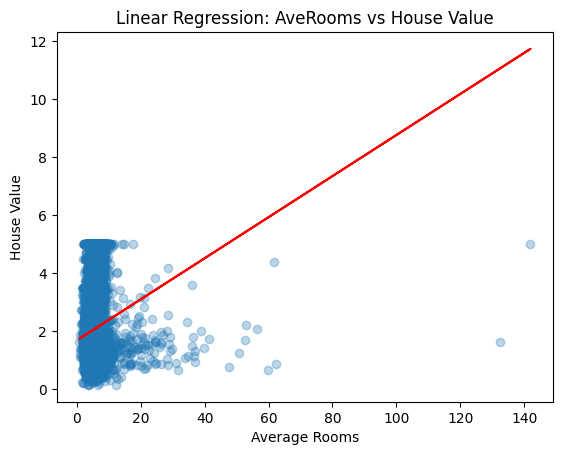

In [2]:

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = data.target

X = df[["AveRooms"]]
y = target

model = LinearRegression()
model.fit(X, y)

# Plot
plt.scatter(X, y, alpha=0.3)
plt.plot(X, model.predict(X), color="red")
plt.xlabel("Average Rooms")
plt.ylabel("House Value")
plt.title("Linear Regression: AveRooms vs House Value")
plt.show()


Task 2: Multiple Linear Regression
● Use the same dataset or load another dataset with at least 4 numeric
features.
● Predict the target variable using multiple independent variables.
● Evaluate the model using:
○ R-squared
○ Mean Squared Error (MSE)
○ Root Mean Squared Error (RMSE)
● Display the coefficients of each feature.

In [3]:

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df
y = target

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Evaluation
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("R-squared:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("Coefficients:", model.coef_)


R-squared: 0.606232685199805
MSE: 0.5243209861846072
RMSE: 0.7241001216576387
Coefficients: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


Task 3: Feature Scaling and Normalization
● Demonstrate the effect of standardizing features using
StandardScaler.
● Compare model performance before and after scaling

In [4]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

print("Score before scaling:", model.score(X_test, y_test))
print("Score after scaling:", model_scaled.score(X_test_scaled, y_test))


Score before scaling: 0.5977095143473671
Score after scaling: 0.5910509795491351


Task 4: Model Interpretation
● Write Python code to:
○ Show the correlation matrix using a heatmap.
○ Identify which features have the strongest relationship with
the target.
○ Discuss multicollinearity and how it might affect regression.

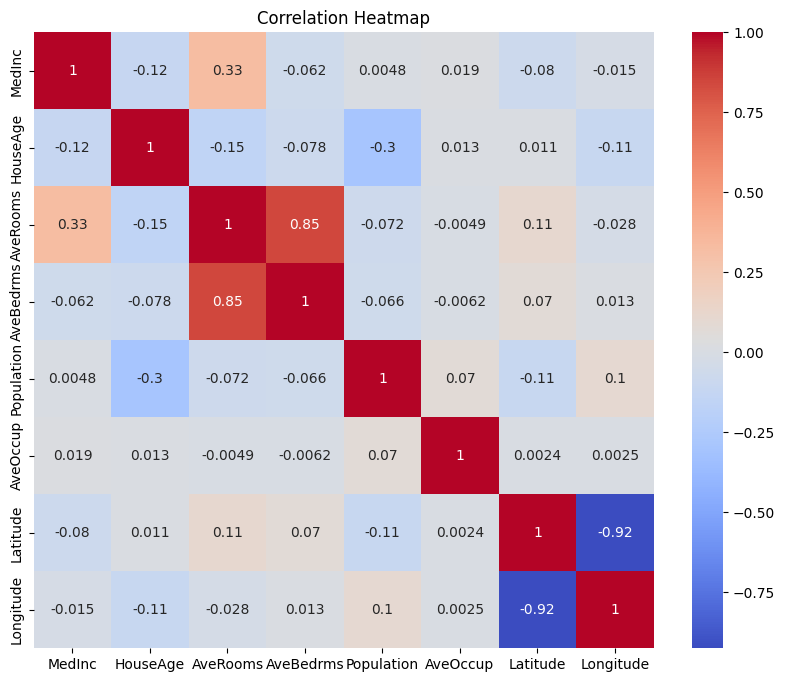

In [5]:

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Part II: Logistic Regression

Task 5: Binary Classification
● Load the Breast Cancer Dataset from sklearn.datasets.
● Train a logistic regression model to predict whether a tumor is
benign or malignant.
● Evaluate using:
○ Accuracy
○ Confusion Matrix
○ Precision, Recall, F1-score
○ ROC-AUC curve

Accuracy: 0.9578207381370826
Confusion Matrix:
 [[197  15]
 [  9 348]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       212
           1       0.96      0.97      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569

ROC-AUC: 0.994714867078907


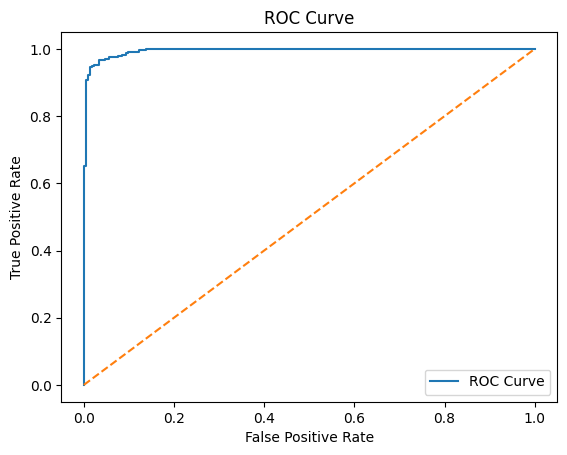

In [6]:

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
# Model
model = LogisticRegression(max_iter=10000)
model.fit(X, y)
# Predict
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]
# Evaluation
print("Accuracy:", model.score(X, y))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))
print("ROC-AUC:", roc_auc_score(y, y_prob))
# ROC Curve
fpr, tpr, _ = roc_curve(y, y_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Task 6: Threshold Tuning
● Predict the probability of the positive class.
● Change the threshold (e.g., 0.3, 0.5, 0.7) and observe how the
confusion matrix and F1-score change.
● Plot the ROC curve and mark optimal threshold.

In [7]:

import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [0.3, 0.5, 0.7]

for t in thresholds:
    y_thresh = (y_prob >= t).astype(int)
    print(f"\nThreshold = {t}")
    print("Precision:", precision_score(y, y_thresh))
    print("Recall:", recall_score(y, y_thresh))
    print("F1 Score:", f1_score(y, y_thresh))



Threshold = 0.3
Precision: 0.946236559139785
Recall: 0.9859943977591037
F1 Score: 0.9657064471879286

Threshold = 0.5
Precision: 0.9586776859504132
Recall: 0.9747899159663865
F1 Score: 0.9666666666666667

Threshold = 0.7
Precision: 0.9826589595375722
Recall: 0.9523809523809523
F1 Score: 0.9672830725462305


Task 7: Multiclass Classification (Optional)
● Use the Iris Dataset to perform multiclass logistic regression.
● Use one-vs-rest or multinomial strategy.
● Evaluate model accuracy and classification report.

In [8]:

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

data = load_iris()
X, y = data.data, data.target

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
model.fit(X, y)
y_pred = model.predict(X)

print("Accuracy:", model.score(X, y))
print(classification_report(y, y_pred))


Accuracy: 0.9733333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



c:\Users\2020k\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Part III: General Questions

1. What are the assumptions of linear regression?

Linearity, independence of errors, homoscedasticity, normality of residuals, and no multicollinearity.

2. When should you use logistic regression instead of linear regression?

When the dependent variable is binary or categorical.

3. What is the interpretation of coefficients in logistic regression?

Each coefficient represents the change in the log-odds of the outcome for a one-unit increase in the predictor.

4. What is the difference between sigmoid and softmax functions?

Sigmoid is used for binary classification; Softmax is used for multi-class classification and gives probability distributions.

5. Why is R-squared not suitable for evaluating logistic regression
models?

Because logistic regression deals with classification, not continuous outcomes. R² is for regression metrics, not classification accuracy.